## Classical Hopfield Network Demonstration on MNIST 

this notebook has bugs

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

Some Useful Functions

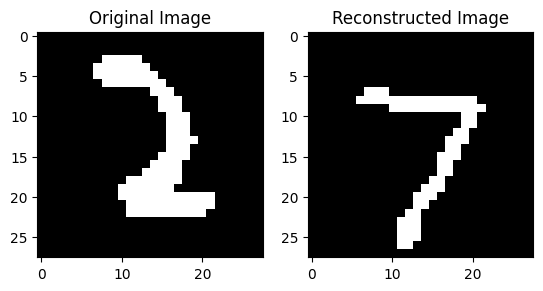

In [12]:

#from sklearn.datasets import fetch_openml
from sklearn.preprocessing import binarize

# Function to sample with handling for labels with fewer than 10 samples
def safe_sample(group, n):
    if len(group) < n:
        return group
    return group.sample(n=n, random_state=1)

# Load MNIST dataset
def load_mnist():
    data = pd.read_csv('./mnist_test.csv')
    y = data.iloc[:, 0].values  # Labels
    X = data.iloc[:, 1:].values / 255.0  # Normalize pixel values
    return X, y

# Binarize the images
def binarize_images(X):
    X_bin = binarize(X, threshold=0.5)
    return X_bin

# Hopfield Network Class
class HopfieldNetwork:
    def __init__(self, n_features):
        self.n_features = n_features
        self.weights = np.zeros((n_features, n_features))
    
    def train(self, patterns):
        n_patterns = patterns.shape[0]
        for p in patterns:
            self.weights += np.outer(p, p)
        self.weights[np.diag_indices(self.n_features)] = 0
        self.weights /= n_patterns
    
    def predict(self, pattern, max_steps=100):
        s = np.copy(pattern)
        for _ in range(max_steps):
            for i in range(self.n_features):
                s[i] = 1 if np.dot(self.weights[i], s) >= 0 else -1
        return s

# Test Hopfield network with MNIST
def test_hopfield_network():
    X, y = load_mnist()
    X_bin = binarize_images(X)
    X_bin[X_bin == 0] = -1  # Convert to -1 and 1

    # Using a small subset of MNIST for training
    n_train = 2
    train_patterns = X_bin[:n_train]

    hopfield_net = HopfieldNetwork(n_features=784)
    hopfield_net.train(train_patterns)

    test_image = X_bin[236]
    reconstructed_image = hopfield_net.predict(test_image)

    # Plot original and reconstructed images
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(test_image.reshape(28, 28), cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image.reshape(28, 28), cmap='gray')

    plt.show()

# Run the test
test_hopfield_network()
